In [1]:
#数据导入

import pandas as pd

test = pd.read_excel('Desktop/test.xlsx')
test.head()

date    group  requests         gmv  coupon per trip  trips  \
0 2019-01-01  control        30    7486.620         1.069746     24   
1 2019-01-02  control       152   38301.575         1.044199    121   
2 2019-01-03  control       267   67768.425         1.032276    215   
3 2019-01-04  control       369   94992.900         1.028196    298   
4 2019-01-05  control       478  123236.875         1.011807    390   

   canceled requests  
0                  1  
1                  8  
2                 14  
3                 19  
4                 24

In [ ]:
#该代码及分析均来自于
https://www.kesci.com/home/project/5f06b0193af6a6002d0fa357/code
##此处仅作为练习

In [2]:
#计算ROI
test['ROI']=test['gmv']/(test['coupon per trip']*test['trips'])
test.head()

date    group  requests         gmv  coupon per trip  trips  \
0 2019-01-01  control        30    7486.620         1.069746     24   
1 2019-01-02  control       152   38301.575         1.044199    121   
2 2019-01-03  control       267   67768.425         1.032276    215   
3 2019-01-04  control       369   94992.900         1.028196    298   
4 2019-01-05  control       478  123236.875         1.011807    390   

   canceled requests         ROI  
0                  1  291.604269  
1                  8  303.143166  
2                 14  305.346684  
3                 19  310.026761  
4                 24  312.304607

In [3]:
#requests方差检验
###levene检验requests是否齐方差

requests_A=test[test.group=='control'].requests
requests_B=test[test.group=='experiment'].requests

import scipy.stats as st
st.levene(requests_A,requests_B)

LeveneResult(statistic=0.014685075667736849, pvalue=0.903980667108546)

In [ ]:
#p值大于0.05，不拒绝原假设，因此可认为两组实验requests齐方差。

In [4]:
#requests均值检验
##配对样本t检验（两独立样本t检验之前需检验是否齐方差，此处不需要）

st.ttest_rel(requests_A,requests_B)

Ttest_relResult(statistic=1.6436140982479508, pvalue=0.11143970454099936)

In [ ]:
#p值大于0.05，不拒绝原假设，因此可认为实验条件对requests影响不显著

In [5]:
#gmv方差检验
#levene检验gmv是否齐方差

gmv_A=test[test.group=='control'].gmv
gmv_B=test[test.group=='experiment'].gmv

st.levene(gmv_A,gmv_B)

LeveneResult(statistic=0.02865341299111212, pvalue=0.8661917430097603)

In [ ]:
#p值大于0.05，不拒绝原假设，因此可认为两组实验gmv齐方差。

In [6]:
#gmv均值检验
#配对样本t检验（两独立样本t检验之前需检验是否齐方差，此处不需要）

st.ttest_rel(gmv_A,gmv_B)

Ttest_relResult(statistic=4.247583846321442, pvalue=0.00021564303983362577)

In [ ]:
#p值小于0.05，拒绝原假设，因此可认为实验条件对gmv有显著影响。

In [7]:
#ROI方差检验
##levene检验ROI是否齐方差

ROI_A=test[test.group=='control'].ROI
ROI_B=test[test.group=='experiment'].ROI

st.levene(ROI_A,ROI_B)

LeveneResult(statistic=0.10363884745479335, pvalue=0.7487044961896305)

In [ ]:
#p值大于0.05，不拒绝原假设，因此可认为两组实验ROI齐方差。

In [8]:
#ROI均值检验
##配对样本t检验（两独立样本t检验之前需检验是否齐方差，此处不需要）

st.ttest_rel(ROI_A,ROI_B)

Ttest_relResult(statistic=10.305504459268173, pvalue=4.93261342734923e-11)

In [ ]:
#p值小于0.05，拒绝原假设，因此可认为实验条件对ROI有显著影响

In [9]:
#城市运营分析
##数据导入
city = pd.read_excel('Desktop/city.xlsx')
city.head()

date  hour  requests  trips  supply hours  average minutes of trips  \
0 2013-09-01    11        79     55         42.63                     20.43   
1 2013-09-01    12        73     41         36.43                     15.53   
2 2013-09-01    13        54     50         23.02                     17.76   
3 2013-09-02    11       193    170         64.20                     31.47   
4 2013-09-02    12       258    210         80.28                     38.68   

   pETA  aETA    utiliz  
0  5.51  7.19  0.479240  
1  5.48  8.48  0.426297  
2  5.07  8.94  0.771503  
3  5.31  6.55  0.490187  
4  4.94  6.08  0.481814

In [10]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      90 non-null     datetime64[ns]
 1   hour                      90 non-null     int64         
 2   requests                  90 non-null     int64         
 3   trips                     90 non-null     int64         
 4   supply hours              90 non-null     float64       
 5   average minutes of trips  90 non-null     float64       
 6   pETA                      90 non-null     float64       
 7   aETA                      90 non-null     float64       
 8   utiliz                    90 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 6.5 KB


In [11]:
#数据探索
##单量最多的时间点
req_hour = city.groupby(['hour'],as_index=True).agg({'requests':sum},inplace=True)
req_hour

requests
hour          
11        6008
12        8530
13        6559

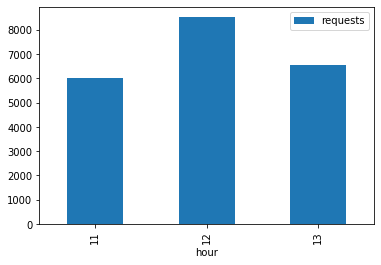

In [12]:
import matplotlib.pyplot as plt

req_hour.plot(kind='bar')

plt.show()

In [13]:
#单量最多的日期
req_date = city.groupby(['date'],as_index=True).agg({'requests':sum},inplace=True)
req_date.sort_values('date').head()

requests
date                
2013-09-01       206
2013-09-02       604
2013-09-03       238
2013-09-04       199
2013-09-05       782

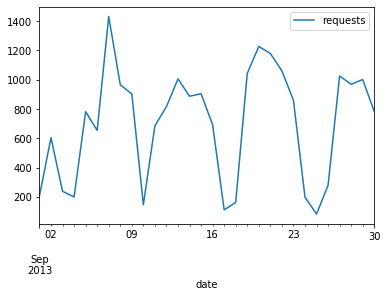

In [14]:
req_date.plot(kind='line')

plt.show()

In [15]:
#各时段订单完成率
com_hour = city.groupby(['hour'],as_index=False).agg({'requests':sum,'trips':sum},inplace=True)
com_hour['rate']=com_hour['trips']/com_hour['requests']
com_hour

hour  requests  trips      rate
0    11      6008   4550  0.757324
1    12      8530   5850  0.685815
2    13      6559   3085  0.470346

In [16]:
#单月每日订单完成率
com_date = city.groupby(['date'],as_index=True).agg({'requests':sum,'trips':sum},inplace=True)
com_date['rate']=com_date['trips']/com_date['requests']
com_date.sort_values('date').head()

requests  trips      rate
date                                 
2013-09-01       206    146  0.708738
2013-09-02       604    487  0.806291
2013-09-03       238     83  0.348739
2013-09-04       199    102  0.512563
2013-09-05       782    532  0.680307

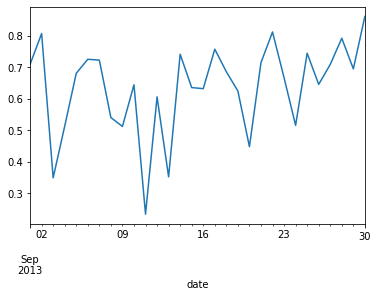

In [17]:
com_date.rate.plot(kind='line')
plt.show()

In [18]:
#顾客等待时间
import numpy as np

eta_hour = city.groupby(['hour'],as_index=True).agg({'pETA':np.mean,'aETA':np.mean},inplace=True)
eta_hour

pETA      aETA
hour                    
11    5.397333  6.611000
12    5.860000  7.253333
13    6.018333  7.732667

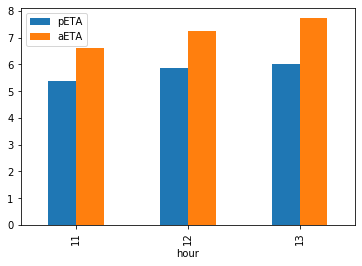

In [19]:
eta_hour.plot(kind='bar')

In [20]:
#司机在忙率
city['busy'] = city['supply hours']*city['utiliz']
city.head()

date  hour  requests  trips  supply hours  average minutes of trips  \
0 2013-09-01    11        79     55         42.63                     20.43   
1 2013-09-01    12        73     41         36.43                     15.53   
2 2013-09-01    13        54     50         23.02                     17.76   
3 2013-09-02    11       193    170         64.20                     31.47   
4 2013-09-02    12       258    210         80.28                     38.68   

   pETA  aETA    utiliz   busy  
0  5.51  7.19  0.479240  20.43  
1  5.48  8.48  0.426297  15.53  
2  5.07  8.94  0.771503  17.76  
3  5.31  6.55  0.490187  31.47  
4  4.94  6.08  0.481814  38.68

In [21]:
busy_hour = city.groupby(['hour'],as_index=False).agg({'supply hours':sum,'busy':sum})
busy_hour['utiliz'] = busy_hour['busy']/busy_hour['supply hours']
busy_hour

hour  supply hours     busy    utiliz
0    11       1660.01   768.51  0.462955
1    12       1818.03  1115.28  0.613455
2    13       1274.60   730.83  0.573380

In [22]:
#订单时长
trip_min = city.groupby(['hour'],as_index=False).agg({'average minutes of trips':np.mean})
trip_min

hour  average minutes of trips
0    11                    25.617
1    12                    37.176
2    13                    24.361

In [23]:
supply_hour = city.groupby(['hour'],as_index=False).agg({'supply hours':np.mean})
supply_hour

hour  supply hours
0    11     55.333667
1    12     60.601000
2    13     42.486667

In [ ]:
#13点订单量也较大，此时点司机服务时长较短。
#为优化用户出行体验，司机运营平台可联合客运部可考虑此时段尽量分配总服务时长较长的司机来接单（经验较为丰富）。